# On Why Gradient Descent Is Needed

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', -1)
#pd.set_option('display.max_rows', None)
#3pd.options.mode.chained_assignment = None  # default='warn'

# helpers
import json
import collections
import datetime
import os

# plotting
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [22,8]
plt.style.use('ggplot')

In [3]:
with open('voter_reg_2017-2019.json') as f:
    d = json.load(f)

In [4]:
len(d['data'])

12

In [5]:
print(type(d['data'][0]))
level1_keys = d['data'][0].keys()
print(level1_keys)
for inner_d in d['data']:
    for k in level1_keys:
        if k != "values":
            print(f"{k}:{inner_d[k]}", sep=",")
    print()

<class 'dict'>
dict_keys(['_count', '_group_count', 'count:sum', 'value', 'values'])
_count:1575.0
_group_count:1575
count:sum:74425.0
value:14-15

_count:1579.0
_group_count:1579
count:sum:2151527.0
value:16-17

_count:212.0
_group_count:212
count:sum:159483.0
value:16-18

_count:1790.0
_group_count:1790
count:sum:9373708.0
value:18-24

_count:1790.0
_group_count:1790
count:sum:12748432.0
value:25-34

_count:1790.0
_group_count:1790
count:sum:7289431.0
value:35-44

_count:1790.0
_group_count:1790
count:sum:4852852.0
value:45-54

_count:1790.0
_group_count:1790
count:sum:3031518.0
value:55-64

_count:1790.0
_group_count:1790
count:sum:1733538.0
value:65-74

_count:1790.0
_group_count:1790
count:sum:969091.0
value:> 75

_count:415.0
_group_count:415
count:sum:704.0
value:not_provided

_count:13.0
_group_count:13
count:sum:13.0
value:over18



In [6]:
categories_to_keep = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '> 75']

In [7]:
data = d['data']

In [8]:
data = {dic['value']:dic for dic in data}

In [9]:
dfs = []
for cat in categories_to_keep:
    dic = data[cat]
    records = [(v['_start_at'], v['count:sum']) for v in dic['values']]
    df = pd.DataFrame.from_records(records)
    df.columns = ['ds', cat]
    dfs.append(df)
    

In [10]:
df = dfs[0]
for _df in dfs[1:]:
    df = pd.merge(df, _df, how='outer', on='ds')

In [11]:
df.ds = pd.to_datetime(df.ds).dt.date
df = df.set_index('ds')

In [12]:
xlims = (df.index.min() - datetime.timedelta(days=10), df.index.max() + datetime.timedelta(days=10))

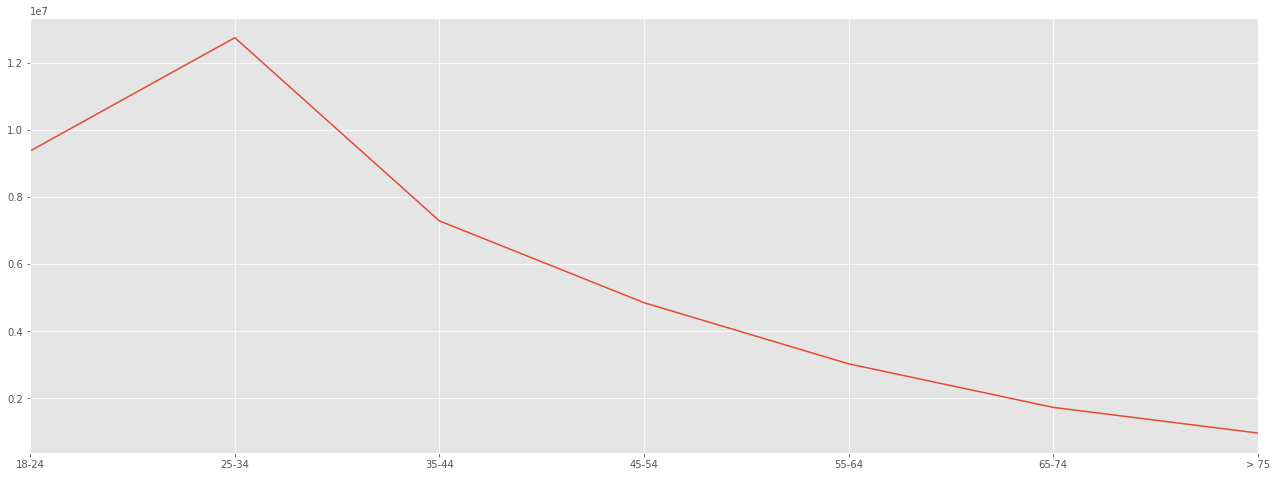

In [13]:
ax = df.sum().plot()

(735589.0, 737399.0)

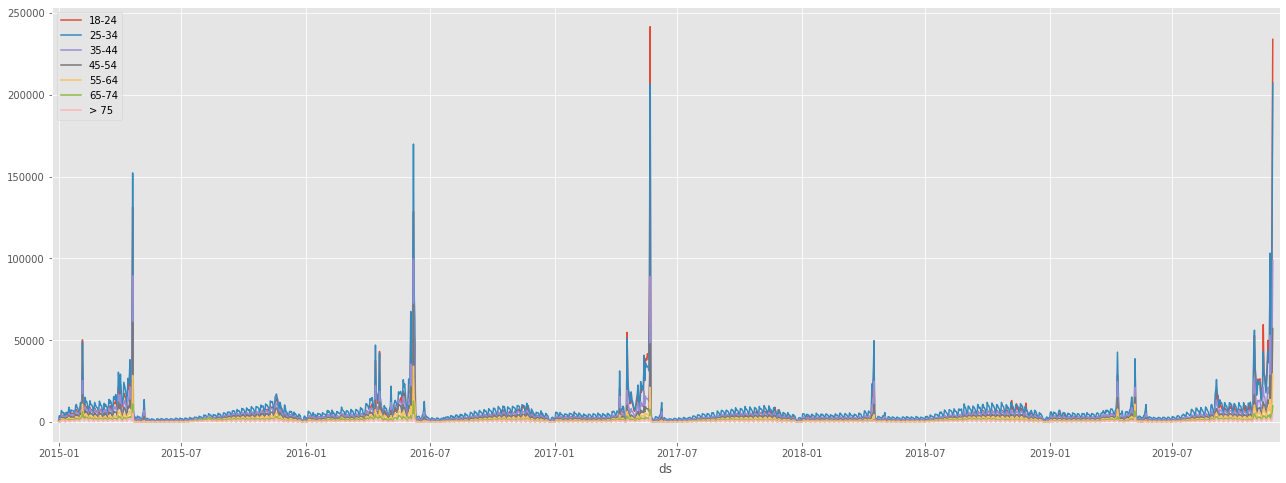

In [14]:
ax = df.groupby(level=0).sum().plot()
ax.set_xlim(xlims)

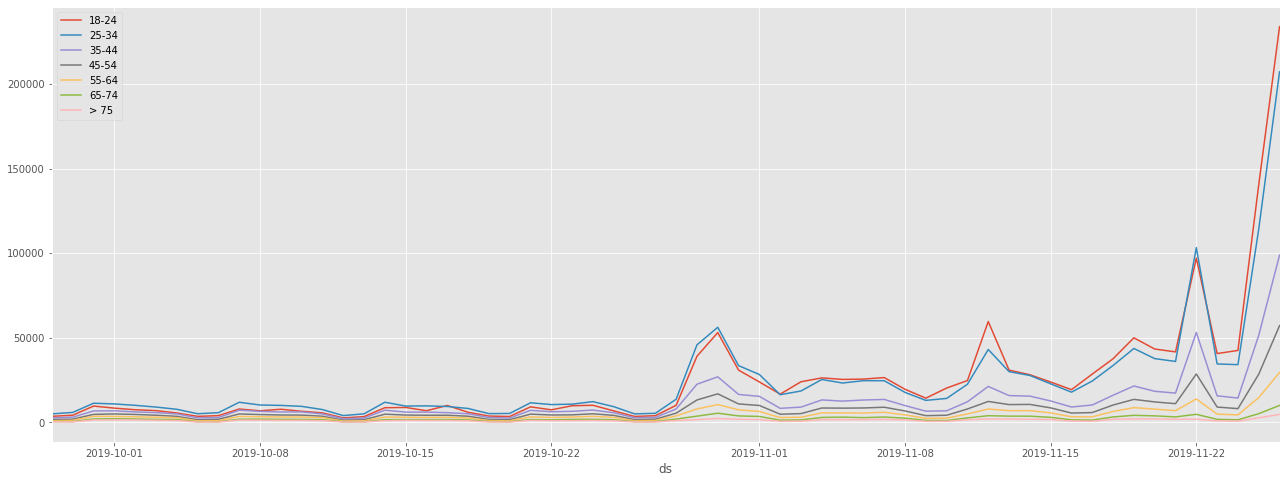

In [15]:
ax = df.groupby(level=0).sum()[-60:].plot()

In [16]:
df.columns[:2]
df.columns[2:]

Index(['35-44', '45-54', '55-64', '65-74', '> 75'], dtype='object')

In [17]:
df['< 35'] = df[df.columns[:2]].sum(axis=1)
df['>= 35'] = df[df.columns[2:]].sum(axis=1)

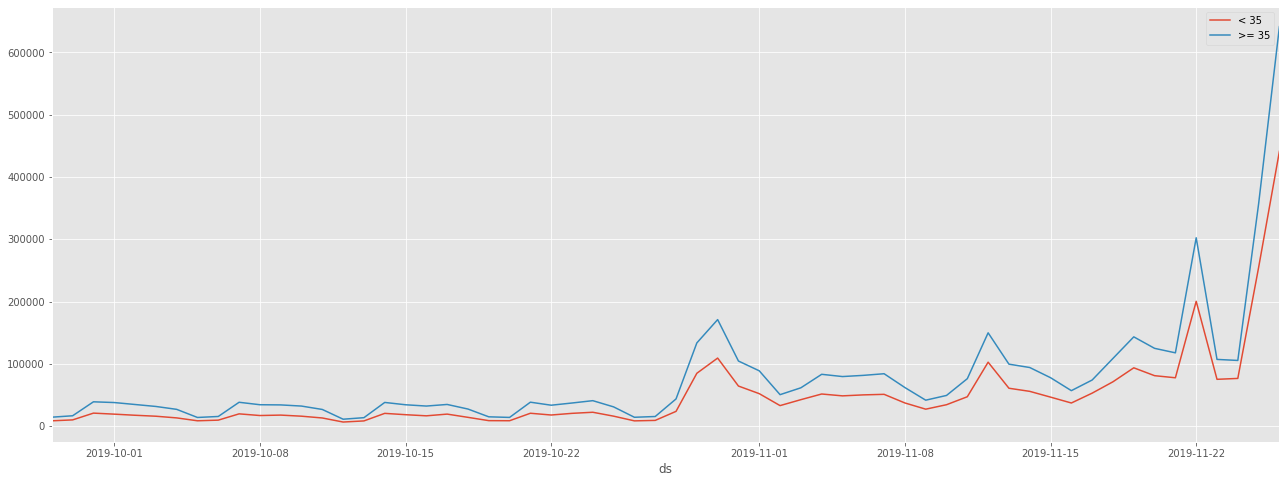

In [18]:
ax = df[df.columns[-2:]].groupby(level=0).sum()[-60:].plot()
ax

In [19]:
df.sum(axis=1).sort_values(ascending=False)

ds
2019-11-26    1723415.0
2017-05-22    1683449.0
2016-06-07    1342360.0
2015-04-20    1242106.0
2019-11-25    968322.0 
                ...    
2018-12-25    4411.0   
2015-12-25    3686.0   
2017-12-25    3566.0   
2016-12-25    2933.0   
2019-05-16    0.0      
Length: 1791, dtype: float64

In [20]:
election_register_cutoffs = df.sum(axis=1).sort_values(ascending=False)[:4].index.values
election_register_cutoffs

array([datetime.date(2019, 11, 26), datetime.date(2017, 5, 22),
       datetime.date(2016, 6, 7), datetime.date(2015, 4, 20)],
      dtype=object)

In [21]:
day_cols = ['days_before_2019_election', 'days_before_2017_election', 'days_before_2016_ref', 'days_before_2015_election']

In [22]:
legend_labels = [l[12:] for l in day_cols]
legend_labels

['2019_election', '2017_election', '2016_ref', '2015_election']

In [23]:
for i, col in enumerate(day_cols):
    df[col] = (election_register_cutoffs[i] - df.index).days

In [24]:
df

,18-24,25-34,35-44,45-54,55-64,65-74,> 75,< 35,>= 35,days_before_2019_election,days_before_2017_election,days_before_2016_ref,days_before_2015_election
ds,,,,,,,,,,,,,
2015-01-01,983.0,1832.0,855.0,542.0,290.0,163.0,53.0,2815.0,4718.0,1790,872,523,109
2015-01-02,2121.0,3897.0,2105.0,1261.0,667.0,367.0,231.0,6018.0,10649.0,1789,871,522,108
2015-01-03,1833.0,2818.0,1396.0,752.0,421.0,196.0,71.0,4651.0,7487.0,1788,870,521,107
2015-01-04,2294.0,3483.0,1727.0,989.0,544.0,230.0,83.0,5777.0,9350.0,1787,869,520,106
2015-01-05,4283.0,7053.0,4114.0,2877.0,2009.0,1150.0,841.0,11336.0,22327.0,1786,868,519,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-22,97102.0,103243.0,53107.0,28548.0,13778.0,4697.0,1824.0,200345.0,302299.0,4,-914,-1263,-1677
2019-11-23,40626.0,34479.0,15609.0,8991.0,4818.0,1721.0,802.0,75105.0,107046.0,3,-915,-1264,-1678
2019-11-24,42476.0,34066.0,14323.0,8055.0,4357.0,1450.0,672.0,76542.0,105399.0,2,-916,-1265,-1679


In [25]:
df['days_before_registration_deadline'] = df.loc[:, day_cols][(df.loc[:, day_cols] < 60) & (df.loc[:, day_cols] >= 0)][day_cols[0]]
for col in day_cols[1:]:
    df['days_before_registration_deadline'] = df['days_before_registration_deadline'].combine_first(
        df.loc[:, day_cols][(df.loc[:, day_cols] < 60) & (df.loc[:, day_cols] >= 0)][col])

In [26]:
df['election'] = np.where(df.loc[:, day_cols][(df.loc[:, day_cols] < 60) & (df.loc[:, day_cols] >= 0)][day_cols[0]].isnull(), np.NaN, day_cols[0])
for col in day_cols[1:]:
    df['election'][~df.loc[:, day_cols][(df.loc[:, day_cols] < 60) & (df.loc[:, day_cols] >= 0)][col].isnull()] = col

/Users/dbcerigo/miniconda3/envs/helios/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


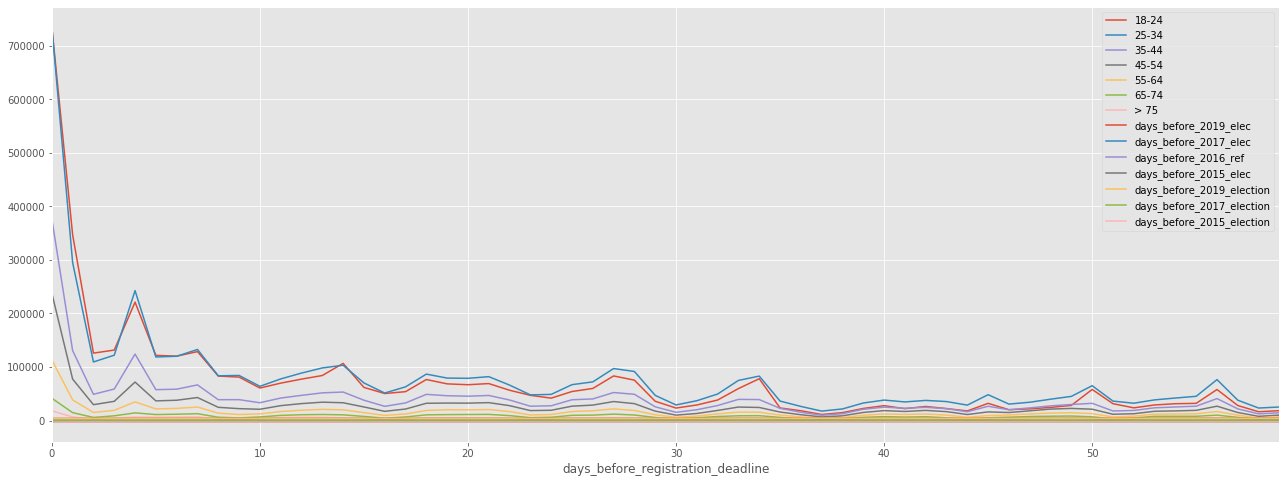

In [191]:
df.groupby('days_before_registration_deadline').sum().plot()

Text(0.5, 1.0, '18-25 Voter Registration')

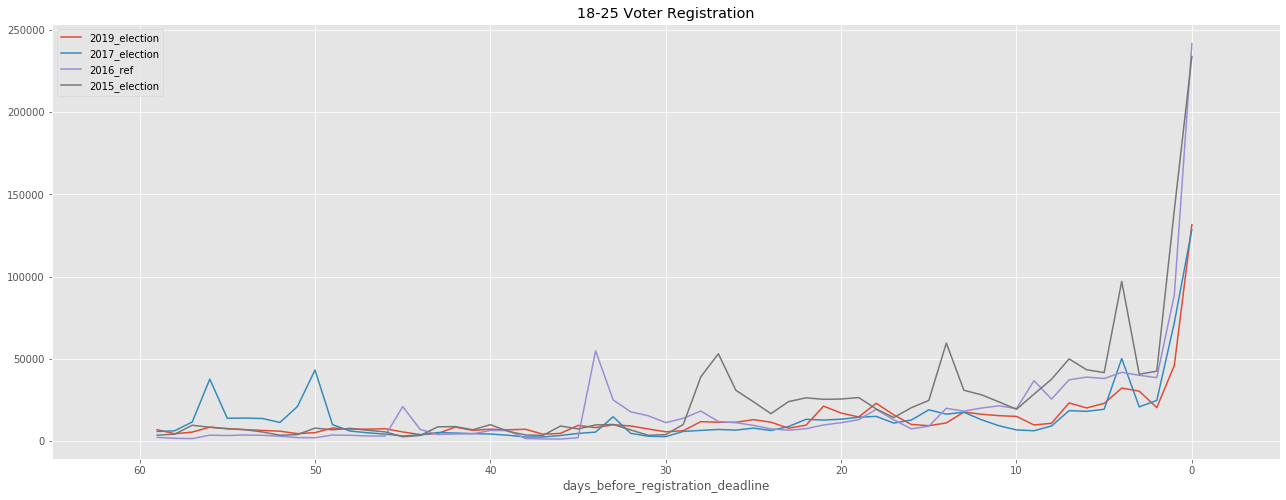

In [27]:
ax = df.dropna().groupby(['election', 'days_before_registration_deadline']).sum(skipna=True).unstack(level=0)['18-24'].plot()
ax.set_xlim(65, -5)
ax.legend(labels=legend_labels[::-1])
ax.set_title('18-25 Voter Registration')

Text(0.5, 1.0, '18-25 Voter Registration Cumulative')

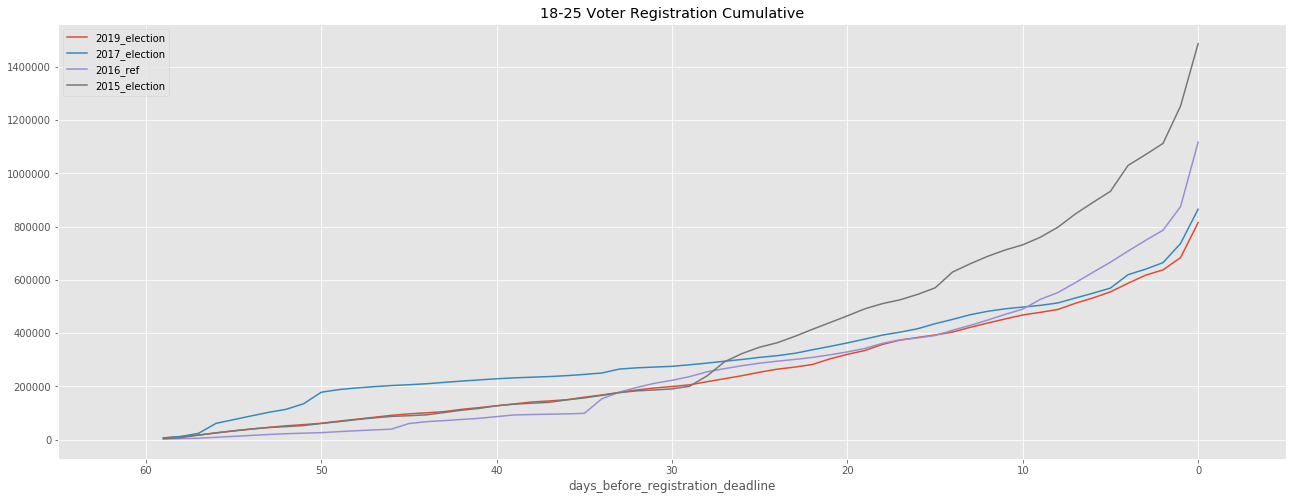

In [28]:
ax = df.dropna().groupby(['election', 'days_before_registration_deadline']).sum(skipna=True).unstack(level=0)['18-24'][::-1].cumsum().plot()
ax.set_xlim(65, -5)
ax.legend(labels=legend_labels[::-1])
ax.set_title('18-25 Voter Registration Cumulative')

Text(0.5, 1.0, '< 35 Voter Registration')

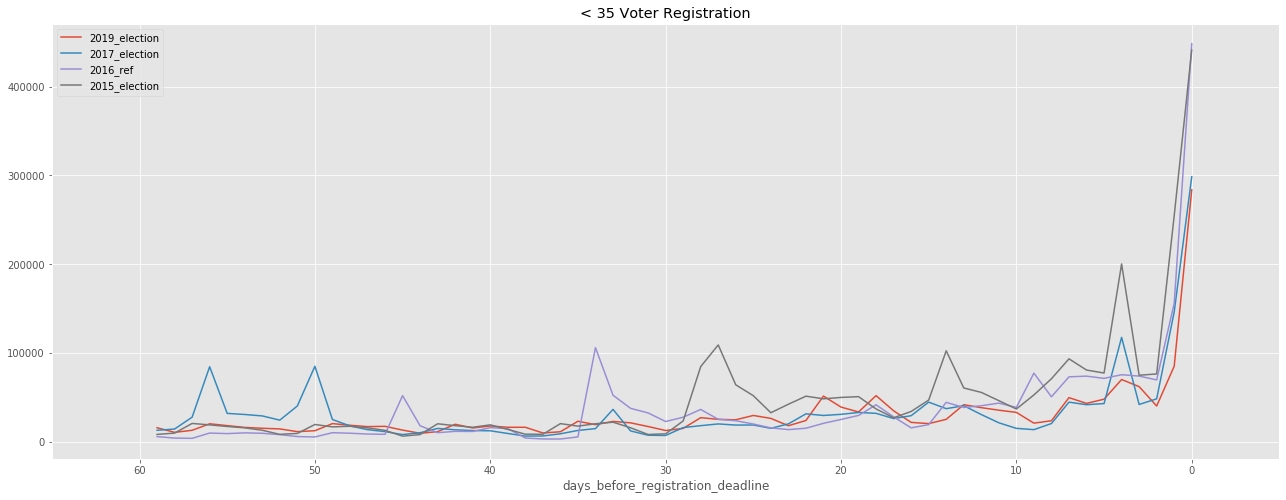

In [29]:
ax = df.dropna().groupby(['election', 'days_before_registration_deadline']).sum(skipna=True).unstack(level=0)['< 35'].plot()
ax.set_xlim(65, -5)
ax.legend(labels=legend_labels[::-1])
ax.set_title('< 35 Voter Registration')

Text(0.5, 1.0, '< 35 Voter Registration Cumulative')

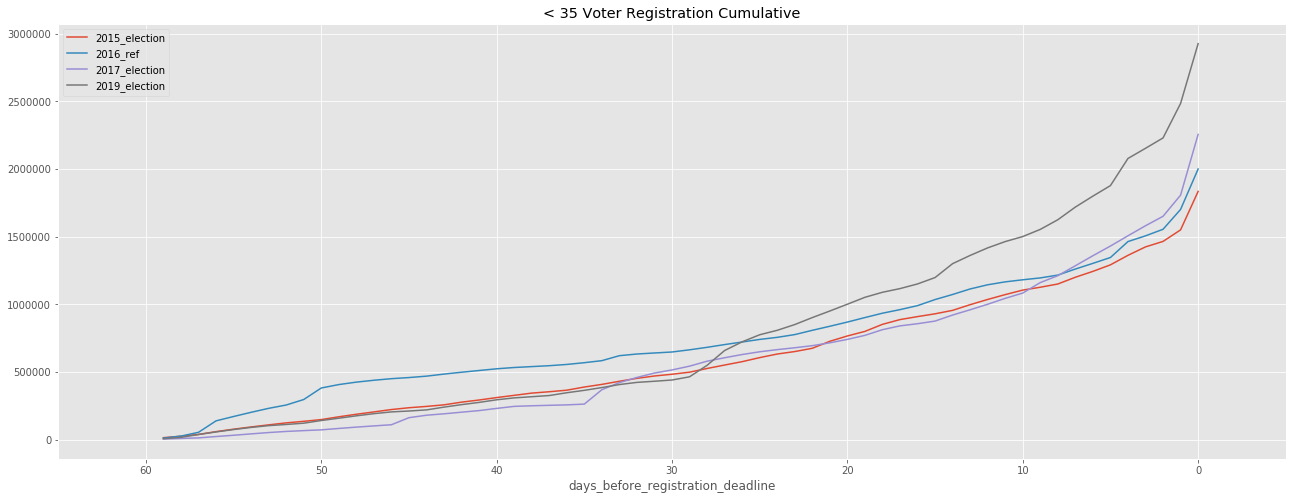

In [32]:
ax = df.dropna().groupby(['election', 'days_before_registration_deadline']).sum(skipna=True).unstack(level=0)['< 35'][::-1].cumsum().plot()
ax.set_xlim(65, -5)
ax.legend(labels=legend_labels[::-1])
ax.set_title('< 35 Voter Registration Cumulative')